In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate()

 Activating environment at `/tmpdir/notebook/Project.toml`


# Chapter 4 - 回帰分析
## 4.1 線形回帰分析

In [2]:
include("../src/data.jl")
include("../src/linear_regression.jl")

using Measures
using Plots

In [3]:
# 1. データの作成
data = regression_data1()

Main.##266.RegressionData([1710; 1786; … ; 2090; 1647], [208500, 223500, 250000, 200000, 345000, 325300, 309000, 177000, 196500, 438780  …  230000, 340000, 179900, 271000, 192140, 186500, 197000, 310000, 240000, 175000], "居住面積x[平方フィート]", "物件価格y[ドル]")

In [4]:
function linear_regression(data; normalize=false)
    # 2. データを学習用と評価用に分割
    n_train = floor(Int64, size(data.X, 1) * 0.9)

    # 学習データ(全体の90%)
    X = normalize ? (data.X .- mean(data.X; dims = 1)) ./ std(data.X; corrected = false, dims = 1) : data.X
    Y = normalize ? (data.Y .- mean(data.Y; dims = 1)) ./ std(data.Y; corrected = false, dims = 1) : data.Y
    x_train = X[1:n_train, :]
    y_train = Y[1:n_train]

    # 評価データ(全体の10%)
    x_test = X[n_train + 1:end, :]
    y_test = Y[n_train + 1:end]

    # 3. 線形モデルの学習
    model = LinearRegression(x_train, y_train)
    train!(model)
    println("モデルパラメーター:\nw=$(model.w), \nb=$(model.b)")
    println("平方平均二乗誤差=$(rmse(model, x_test, y_test))ドル")
    println("決定係数=$(r2(model, x_test, y_test))")
    return model
end

linear_regression (generic function with 1 method)

In [5]:
# 4. 線形モデルの評価
model = linear_regression(data)

モデルパラメーター:
w=[118.33107052341121], 
b=2137.450403389295
平方平均二乗誤差=30813.160078722958ドル
決定係数=0.636344531102756


Main.##266.LinearRegression([1710; 1786; … ; 5642; 1983], [208500, 223500, 250000, 200000, 345000, 325300, 309000, 177000, 196500, 438780  …  186500, 294000, 165400, 181000, 162000, 237000, 281000, 162900, 160000, 225000], 269, 1, [118.33107052341121], 2137.450403389295)

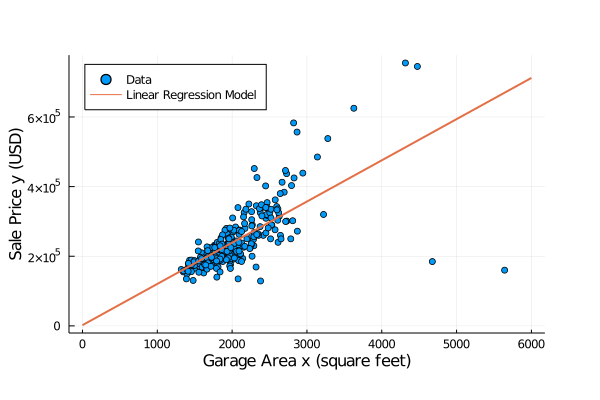

In [6]:
# 5. 線形モデルのプロット
scatter(data.X, data.Y,
        label = "Data",
        legend = :topleft,
        xlabel = "Garage Area x (square feet)",
        ylabel = "Sale Price y (USD)",
        margin = 12mm)
xs = 0:100:6000
# 予測を計算する。xs は reshapeする必要あり
ys = predict(model, reshape(xs, :, 1))
plot!(xs, ys, linewidth = 2, label = "Linear Regression Model")

### 4.1.9 重回帰分析の実行

In [7]:
data2 = regression_data2()
model2 = linear_regression(data2)

モデルパラメーター:
w=[79.50167069361105, 114.96036935925724, -203.8810748153451, -6538.7383569623835, 13845.46420448491], 
b=-72974.80553543598
平方平均二乗誤差=26214.276542583673ドル
決定係数=0.7367954479017438


Main.##266.LinearRegression([1710 548 … 3 8; 1786 608 … 3 6; … ; 5642 1418 … 3 12; 1983 490 … 3 9], [208500, 223500, 250000, 200000, 345000, 325300, 309000, 177000, 196500, 438780  …  186500, 294000, 165400, 181000, 162000, 237000, 281000, 162900, 160000, 225000], 269, 5, [79.50167069361105, 114.96036935925724, -203.8810748153451, -6538.7383569623835, 13845.46420448491], -72974.80553543598)

### 4.1.11 標準化による説明変数の重要度分析

In [8]:
model3 = linear_regression(data2, normalize = true)

モデルパラメーター:
w=[0.47441156896881914, 0.22221602326768525, -0.12198817708215641, -0.04026554228503842, 0.2138660144214882], 
b=0.011788559005896416
平方平均二乗誤差=0.3032830988293844ドル
決定係数=0.7367954479017282


Main.##266.LinearRegression([-0.5954881003970055 -0.21965308251682975 … -0.6723312982489947 0.0751495083697671; -0.4481398753717261 0.13946259235348163 … -0.6723312982489947 -1.422830691800918; … ; 7.027843752226658 4.987524203102685 … -0.6723312982489947 3.0711099087111373; -0.06619776576672569 -0.5667982348914641 … -0.6723312982489947 0.8241396084551096], [-0.363839872719903, -0.19029907425267742, 0.11628966970608773, -0.46217965851799747, 1.2153813933318496, 0.98746447801156, 0.7988834770105082, -0.7282755495010766, -0.5026725114936834, 2.3003584653489435  …  -0.6183663771385004, 0.6253426785432826, -0.8624804336490643, -0.6819980032431499, -0.9018163479683021, -0.03411235563217442, 0.47494065320502055, -0.8914039000602686, -0.9249551210972656, -0.17294499440595487], 269, 5, [0.47441156896881914, 0.22221602326768525, -0.12198817708215641, -0.04026554228503842, 0.2138660144214882], 0.011788559005896416)

### 4.1.12 外れ値と正則化

モデルパラメーター:
w=[74.13504334944987], 
b=86252.01027293065
平方平均二乗誤差=32907.6767672258ドル
決定係数=0.5852254617550046


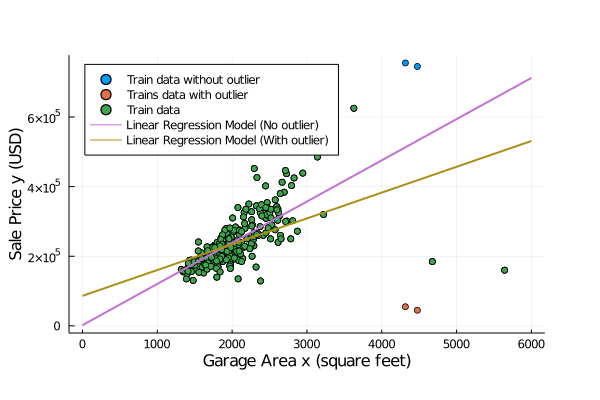

In [9]:
scatter(data.X, data.Y,
        label = "Train data without outlier",
        legend = :topleft,
        xlabel = "Garage Area x (square feet)",
        ylabel = "Sale Price y (USD)",
        margin = 12mm)
data_outlier = regression_data3()
scatter!(data_outlier.X, data_outlier.Y,
        label = "Trains data with outlier")
scatter!(data.X[data.Y .< 700000, :], data.Y[data.Y .< 700000],
        label = "Train data")
plot!(xs, ys, linewidth = 2, label = "Linear Regression Model (No outlier)")
model_outlier = linear_regression(data_outlier)
ys_outlier = predict(model_outlier, reshape(xs, :, 1))
plot!(xs, ys_outlier, linewidth = 2, label = "Linear Regression Model (With outlier)")

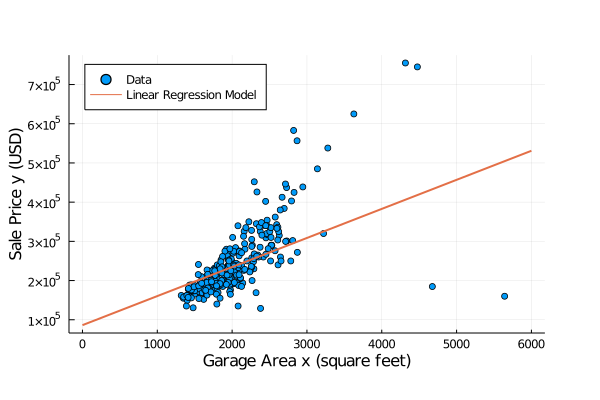

In [10]:
# L2正則平均二乗誤差の正則化
# 正則化項なしの場合
scatter(data.X, data.Y,
        label = "Data",
        legend = :topleft,
        xlabel = "Garage Area x (square feet)",
        ylabel = "Sale Price y (USD)",
        margin = 12mm)
plot!(xs, ys_outlier, linewidth = 2, label = "Linear Regression Model")

モデルパラメーター:
w=[74.13504334944987], 
b=86252.01027293065
平方平均二乗誤差=32907.6767672258ドル
決定係数=0.5852254617550046


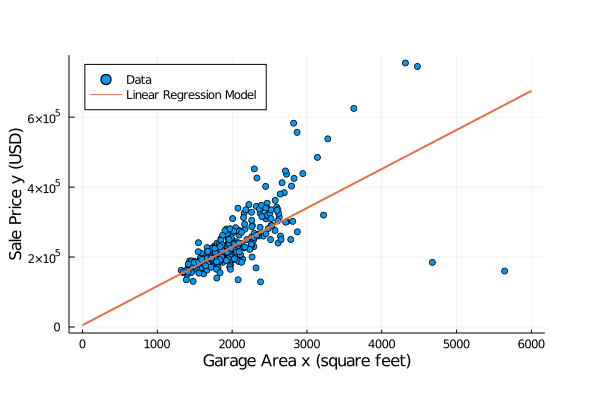

In [11]:
# 正則化項あり(lamb=1)
model_reg = linear_regression(data_outlier)
train_regularized!(model_reg, 1.0)
scatter(data.X, data.Y,
        label = "Data",
        legend = :topleft,
        xlabel = "Garage Area x (square feet)",
        ylabel = "Sale Price y (USD)",
        margin = 12mm)
xs = 0:100:6000
ys_reg = predict(model_reg, reshape(xs, :, 1))
plot!(xs, ys_reg, linewidth = 2, label = "Linear Regression Model")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*